---

![](Header.png)

# Market Making Coding Challenge Event Day

In [1]:
from AmplifyQuantTrading import Data
from AmplifyQuantTrading import Exchange
from AmplifyQuantTrading import MarketMaker
from AmplifyQuantTrading import HedgeFund as hf
from matplotlib import pyplot as plt
from pandas import *

## Inital Setup
### **QuotedTrade object**
This object will be used to quote trades and send them to the hedge funds. The object contains the following attributes:
* ticker: String
* tradeVolume: Integer
* refPrice: Float
* bidPrice: Float
* offerPrice: Float
* date: Integer

In [2]:
class QuotedTrade:
    def __init__(self, ticker, tradeVolume, refPrice, bidPrice, offerPrice, date):
        self.ticker = ticker
        self.tradeVolume = tradeVolume
        self.refPrice = refPrice
        self.bidPrice = bidPrice
        self.offerPrice = offerPrice
        self.date = date 

### Create 2 more objects to be used during this event following a similar structure to the QuoteTrade class.
**Create an CompletedTrade object**
This object will be used to log successful quotedTrades to the market maker object. The object should contain the following attributes:
* ticker: String
* tradeVolume: Integer
* tradePrice: Float
* mmAction: String
* date: Integer

**Create an ExchangeTrade object**
This will be used to create a trade that will be executed using the exchange. The object should contain the following attributes:
* ticker: String
* tradeVolume: Integer
* refPrice: Float
* action: String
* date: Integer

In [3]:
class CompletedTrade:
    def __init__(self,ticker, tradeVolume, tradePrice, mmAction, date):
        self.ticker = ticker
        self.tradeVolume = tradeVolume
        self.tradePrice = tradePrice
        self.mmAction = mmAction
        self.date = date

In [4]:
class ExchangeTrade:
    def __init__(self,ticker, tradeVolume, refPrice, action, date):
        self.ticker = ticker
        self.tradeVolume = tradeVolume
        self.refPrice = refPrice
        self.action = action
        self.date = date

# Level One - Coordinator Guided
## 1. Interpreting trades and giving non-skewed price responses

In [5]:
prices = Data.priceSeries()
priceRequests = Data.priceRequests()

### a) Iterate through the first ten prices and price requests

#### Complete the functions below called *loopPrices* and *loopRequests* to access the data from the objects initialised above and store them in two lists.

In [6]:
firstTenPrices = []

In [7]:
for x in range(0,10):
    price = prices[x]
    firstTenPrices.append(price)
    
#check 
print(firstTenPrices)

[['AAPL', 0, 74.7], ['FAANG', 0, 117.0], ['FB', 0, 194.44], ['AAPL', 5000, 74.81399], ['FAANG', 5000, 117.2705], ['FB', 5000, 193.5296], ['AAPL', 10000, 74.63035], ['FAANG', 10000, 120.3612], ['FB', 10000, 195.9118], ['AAPL', 15000, 73.83297]]


In [8]:
firstTenRequests = []

In [9]:
for x in range(0,10):
    request = priceRequests[x]
    firstTenRequests.append(request)
    
#check 
print(firstTenRequests)

[['FB', 0, 423], ['AAPL', 10000, 2808], ['FB', 30000, 1375], ['FB', 70000, 753], ['AAPL', 105000, 4145], ['AAPL', 110000, 949], ['FB', 115000, 89], ['AAPL', 120000, 1204], ['FB', 130000, 1725], ['FB', 150000, 2363]]


In [10]:
def Submit(firstTenPrices, firstTenRequests):
    print("Submission ready")
a_score = Submit(firstTenPrices, firstTenRequests)


Submission ready


### b) Identify the reference prices for the first ten orders

#### Complete the function below to iterate through the *price requests* and match them with the relevant *date* in the *prices*. Store these reference prices and price requests in an list.

#### matchedPriceRequests should be in the format [ ([price requests], refPrice), ([price requests], refPrice), ...  ]

In [11]:
matchedPriceRequests = []

In [12]:
for request in firstTenRequests:
    for price in prices:
        if request[0] == price[0] and request[1] == price[1]: #if tickers and date match
            #print("Request", request)
            #print("Price", price)
            matchedPriceRequests.append((request, price[2])) # becuase refPrice is second in list
print(matchedPriceRequests)

[(['FB', 0, 423], 194.44), (['AAPL', 10000, 2808], 74.63035), (['FB', 30000, 1375], 195.7548), (['FB', 70000, 753], 193.3018), (['AAPL', 105000, 4145], 73.13032), (['AAPL', 110000, 949], 73.83167), (['FB', 115000, 89], 185.76), (['AAPL', 120000, 1204], 76.55568), (['FB', 130000, 1725], 191.3214), (['FB', 150000, 2363], 195.8163)]


In [13]:
def Submit(matchedPriceRequests, firstTenRequests):
    print("Submission ready")
b_score = Submit(matchedPriceRequests, firstTenRequests)


Submission ready


### c) Create a non-skewed bid and ask QuotedTrade objects for the first ten orders

#### Using the *matchedPriceRequests* list created from the previous task, use the data available to you to create QuotedTrade objects with a non-skewed bid and ask and store them in an lists.

In [14]:
quotedTrades = []

ticker: String
tradeVolume: Integer
tradePrice: Float
mmAction: String
date: Integer

In [15]:
for request in matchedPriceRequests:
    req = request[0] #seperate the item into 2 things
    refPrice = request[1]
    bidPrice = refPrice * 0.98
    offerPrice = refPrice *1.02
    quote = QuotedTrade(req[0], req[2], refPrice, bidPrice, offerPrice, req[1])
    quotedTrades.append(quote)
    
print(quotedTrades)

[<__main__.QuotedTrade object at 0x7ff71ae3c0d0>, <__main__.QuotedTrade object at 0x7ff71ae3c310>, <__main__.QuotedTrade object at 0x7ff71ae3c2d0>, <__main__.QuotedTrade object at 0x7ff71ae3c250>, <__main__.QuotedTrade object at 0x7ff71ae3c290>, <__main__.QuotedTrade object at 0x7ff71ae3c190>, <__main__.QuotedTrade object at 0x7ff71ae3c210>, <__main__.QuotedTrade object at 0x7ff71ae3c110>, <__main__.QuotedTrade object at 0x7ff71ae3c090>, <__main__.QuotedTrade object at 0x7ff71ae3c1d0>]


In [16]:
def Submit(quotedTrades):
    print("Submission ready")
c_score = Submit(quotedTrades)


Submission ready


### d) Initialise and interact with the HF object to receive trade responses from your quotedTrades

#### Using the *quotedTrades* list, initialise and interact with the HF object to receive a "Buy, Sell, No Trade" response from the HF and store these *completedTrades* in an list.

In [17]:
completedTrades = []

In [18]:
for quote in quotedTrades:
    response = hf.show(quote)
    completedTrades.append(response)

In [19]:
def Submit(completedTrades):
    print("Submission ready")
d_score = Submit(completedTrades)


Submission ready


### e) Store the quotedTrades and completedTrades in the MM object

#### As a Market Maker, it is imperative to keep a log of the trades you have quoted and clients' responses. As a result, interact with the MM object to store the quotedTrades and completedTrades lists into the logs.

In [20]:
mm = MarketMaker.mm()

In [21]:
for quote in quotedTrades:
    mm.addQuotedTrade(quote)
    
for response in completedTrades:
    mmAction = ""
    if response.hfAction ==  "buy":
        mmAction = "sell"
    elif response.hfAction == "sell":
        mmAction = "buy"
    else:
        mmAction = "refuse"    
    completedTrade = CompletedTrade(response.ticker, response.tradeVolume, response.tradePrice, mmAction, response.date)
    mm.addTrade(completedTrade)
print(mm.quotedTrades)
print()
print(mm.completedTrades)

[<__main__.QuotedTrade object at 0x7ff71ae3c0d0>, <__main__.QuotedTrade object at 0x7ff71ae3c310>, <__main__.QuotedTrade object at 0x7ff71ae3c2d0>, <__main__.QuotedTrade object at 0x7ff71ae3c250>, <__main__.QuotedTrade object at 0x7ff71ae3c290>, <__main__.QuotedTrade object at 0x7ff71ae3c190>, <__main__.QuotedTrade object at 0x7ff71ae3c210>, <__main__.QuotedTrade object at 0x7ff71ae3c110>, <__main__.QuotedTrade object at 0x7ff71ae3c090>, <__main__.QuotedTrade object at 0x7ff71ae3c1d0>]

[<__main__.CompletedTrade object at 0x7ff71aee8f90>, <__main__.CompletedTrade object at 0x7ff71aee89d0>, <__main__.CompletedTrade object at 0x7ff71ae39350>, <__main__.CompletedTrade object at 0x7ff71aeecc50>, <__main__.CompletedTrade object at 0x7ff71aeecdd0>, <__main__.CompletedTrade object at 0x7ff71aeecc90>, <__main__.CompletedTrade object at 0x7ff71aeecfd0>, <__main__.CompletedTrade object at 0x7ff71aeeca90>, <__main__.CompletedTrade object at 0x7ff71aeece50>, <__main__.CompletedTrade object at 0x7f

In [22]:
def Submit(mm, quotedTrades, completedTrades):
    print("Submission ready")
e_score = Submit(mm, quotedTrades, completedTrades)


Submission ready


### f) Create one graphical output for AAPL quotedTrades

#### The graph should be created using the matplotlib library. It should show all the quotedTrades you completed for the ticker AAPL and visualise the *Bid, Ask and Reference Price* against *Date*.

In [23]:
axes = None
bidData = []
offerData = []
quoteDates = []
refData = []
refDates = []

#### Initialise your plot with the <python>fig, axes = plt.subplots() </python> function. Populate the lists you are given, and plot them using <python>axes.plot()</python>.

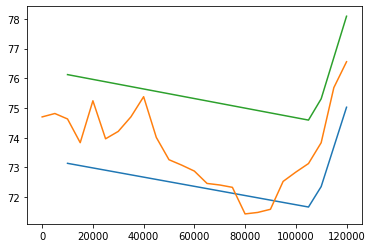

In [24]:
axes = plt.subplot()

quotedTrades = mm.quotedTrades
completedTrades = mm.completedTrades

for quote in quotedTrades:
    for trade in completedTrades:
        if quote.ticker == "AAPL" and quote.date == trade.date:
            quoteDates.append(trade.date)
            bidData.append(quote.bidPrice)
            offerData.append(quote.offerPrice)
        
for price in prices:
    if price[1] <= quoteDates[-1] and price[0] == "AAPL":
        refData.append(price[2])
        refDates.append(price[1])
        
axes.plot(quoteDates, bidData)
axes.plot(refDates, refData)
axes.plot(quoteDates, offerData)

In [25]:
def Submit(axes, bidData, offerData, refData):
    print("Submission ready")
f_score = Submit(axes, bidData, offerData, refData)


Submission ready


In [26]:
def Submit(mm, a_score, b_score, c_score, d_score, e_score, f_score):
    print("Submission ready")
Submit(mm, a_score, b_score, c_score, d_score, e_score, f_score)

Submission ready


# Level Two

## 2. Accessing all price requests and creating skewed prices

In [27]:
#Taking position of risk into account
#if youy executed a trade and bought you are axed long
#for the next trade need to balance this out
#if we have client who wants same as previous we want to skew the bid and offer so we are more likely to 
#sell off long position 

In [28]:
mm = MarketMaker.mm()

### a) Combine your knowledge from level one to create an algorithm to interpret all price requests and provide skewed bid and ask values based on the firm's risk positions.

#### Using the MM function, access the *balance* to determine the firms risk at any given moment. You will then need to use this information to decide if you're Axed Long, Axed Short or Neutral in your position. This will then be reflected in your Bid and Ask prices. 

#### While doing this task, you must remember to log any *quotedTrades* and *completedTrades* to your MM object or risk being fined for poor risk management.

In [33]:
for quote in quotedTrades:
    response = hf.show(quote)
    completedTrades.append(response)
    
risk = int(mm.currentPositions["AAPL"].positionVolume)

    
for response in completedTrades:
    mmAction = ""
    if response.hfAction ==  "buy": #axed long
        newbalance = balance-mmAction
        mmAction = "sell" 
        print(newbalance)
    elif response.hfAction == "sell": #axed short
        newbalance = balance+mmAction
        mmAction = "buy" 
        print(newbalance)
    else:
        mmAction = "neutral"    
    completedTrade = CompletedTrade(response.ticker, response.tradeVolume, response.tradePrice, mmAction, response.date)
    mm.addTrade(completedTrade)
print(mm.quotedTrades)
print()
print(mm.completedTrades)

AttributeError: 'CompletedTrade' object has no attribute 'hfAction'

In [30]:
def Submit(mm):
    print("Submission ready")
Submit(mm)

Submission ready


### b) Create graphical outputs for all the tickers you quotedTrades

#### Similar to the graph created in Level One however it should be done for all the different tickers dealt for the HF client.

In [31]:
hf.show(quotedTrade)
axes = plt.subplot()

quotedTrades = mm.quotedTrades
completedTrades = mm.completedTrades

for quote in quotedTrades:
    for trade in completedTrades:
        if quote.ticker == "AAPL" and quote.date == trade.date:
            quoteDates.append(trade.date)
            bidData.append(quote.bidPrice)
            offerData.append(quote.offerPrice)
        
for price in prices:
    if price[1] <= quoteDates[-1] and price[0] == "AAPL":
        refData.append(price[2])
        refDates.append(price[1])
        
axes.plot(quoteDates, bidData)
axes.plot(refDates, refData)
axes.plot(quoteDates, offerData)

NameError: name 'quotedTrade' is not defined

# Level Three

## 3. Analysing positions of risk to hedge accurately with the FAANG ETF

In [32]:
mm = MarketMaker.mm()

### a) Using your code from Level Two, add a simple FAANG ETF hedge using the nominal values of each asset being traded.

#### When a completed trade has been received from the HF object, you're now to hedge the firm's risk using the FAANG ETF. Determine the volume and current reference price to find the nominal value for the position of risk the firm now holds; this value should then be used to hedge using the FAANG ETF.

#### Once you have determined how much of the FAANG ETF should be purchased, you need to create an ExchangeTrade object to interact with the exchange and complete the trade. You should then log this trade in the *updateETFPosition* function on the MM object.

In [ ]:
# your code here

### Click the space below to help explain your thought process for this task and any improvements in your code

YOUR ANSWER HERE

In [ ]:
def Submit(mm):
    print("Submission ready")
Submit(mm)

### b) Create graphical output of the combined risk nominal value over time

#### This will be the nominal value for all risk at any given time from the position you have open. This data will be stored in the balance.

In [ ]:
# your code here

### c) Create graphical output of the FAANG ETF nominal value position over time

#### This will be the nominal value for the firm's FAANG ETF at any given time. This data will be stored in the balance.

In [ ]:
# your code here

# Level Four

## 4. Analysing positions of risk to hedge using correlation of risk against FAANG ETF

In [ ]:
mm = MarketMaker.mm()

### a) Using your code from Level Two, add a hedge that is determined by the correlation of the risk taken on against the FAANG ETF

#### The FAANG ETF is an exchange traded product that is made up of 5 component equity assets. The 5 assets are all US technology stocks: Facebook, Apple, Amazon, Netflix, Google. The price movement of US technology stocks generally show a high level of correlation, meaning they move in tandem because of macro-economic trends. However, the correlation is not perfect because the price each individual component will also be influenced by micro factors specific to each company. One way a trader can manage their risk exposure is to individual stocks is to take an equal and opposite position in the correlated ETF. 

#### Once you have determined how much of the FAANG ETF should be purchased, you need to create an ExchangeTrade object to interact with the exchange and complete the trade. You should then log this trade in the *updateETFPosition* function on the MM object.

In [ ]:
# your code here

### Click the space below to help describe the concept for how you approached this task

YOUR ANSWER HERE

### b) Create graphical output of the combined risk nominal value over time

#### This will be the nominal value for all risk at any given time from the position you have open. This data will be stored in the balance.

In [ ]:
# your code here

### c) Create graphical output of the FAANG ETF nominal value position over time

#### This will be the nominal value for the firm's FAANG ETF at any given time. This data will be stored in the balance.

In [ ]:
# your code here